In [1]:
# pip install pydantic
# pip install pydantic-settings
# pip install xlrd
# pip install pandas-profiling
# pip install ydata-profiling

In [116]:
import pandas as pd
import numpy as np
from pydantic_settings import BaseSettings
from ydata_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [115]:
df = pd.read_excel(r"C:\\Users\Alex\Documents\GitHub\Responsible Lenders - ALM\default of credit card clients.xls", header=1)
# df

In [14]:
# profile = ProfileReport(df, title="The Profile")
# profile

In [75]:
data = df.drop(["ID"],axis=1).rename(columns={"PAY_0":"PAY_1","default payment next month":"DEFAULT"}).replace({"EDUCATION":{0:4,5:4,6:4},"MARRIAGE":{0:3}})
# data.PAY_1.value_counts()
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [87]:
# X = data.drop(["DEFAULT"],axis=1)
# y = data.DEFAULT

data_train, data_test = train_test_split(data.copy(),
                                         shuffle = True,
                                         random_state = 42,
                                         test_size = 0.2,
                                         stratify = data["DEFAULT"])

# print(data.DEFAULT.value_counts(normalize=True))
# print(data_train.DEFAULT.value_counts(normalize=True))
# print(data_test.DEFAULT.value_counts(normalize=True))

In [88]:
# X_train = data_train.drop(["DEFAULT"],axis=1)
# y_train = data_train.DEFAULT
# X_test = data_test.drop(["DEFAULT"],axis=1)
# y_test = data_test.DEFAULT


kfold = StratifiedKFold(n_splits = 5,
                        shuffle = True,
                        random_state = 42)

In [91]:
i = 1
for train_index, test_index in kfold.split(data_train.drop(["DEFAULT"],axis=1),data_train.DEFAULT):
    print("Split",i)
    print("CV Training Set Split")
    print(data_train.iloc[train_index].DEFAULT.value_counts(normalize=True))
    
    print()
    
    print("CV Holdout Set Split")
    print(data_train.iloc[test_index].DEFAULT.value_counts(normalize=True))
    
    print()
    print("+++++++++++++++++++")
    print()
    
    i = i + 1

Split 1
CV Training Set Split
0    0.77875
1    0.22125
Name: DEFAULT, dtype: float64

CV Holdout Set Split
0    0.778958
1    0.221042
Name: DEFAULT, dtype: float64

+++++++++++++++++++

Split 2
CV Training Set Split
0    0.778802
1    0.221198
Name: DEFAULT, dtype: float64

CV Holdout Set Split
0    0.77875
1    0.22125
Name: DEFAULT, dtype: float64

+++++++++++++++++++

Split 3
CV Training Set Split
0    0.778802
1    0.221198
Name: DEFAULT, dtype: float64

CV Holdout Set Split
0    0.77875
1    0.22125
Name: DEFAULT, dtype: float64

+++++++++++++++++++

Split 4
CV Training Set Split
0    0.778802
1    0.221198
Name: DEFAULT, dtype: float64

CV Holdout Set Split
0    0.77875
1    0.22125
Name: DEFAULT, dtype: float64

+++++++++++++++++++

Split 5
CV Training Set Split
0    0.778802
1    0.221198
Name: DEFAULT, dtype: float64

CV Holdout Set Split
0    0.77875
1    0.22125
Name: DEFAULT, dtype: float64

+++++++++++++++++++



In [110]:
log_reg = LogisticRegression(penalty=None,max_iter=1000)
accs = []
cutoff = 0.2

for train_index, test_index in kfold.split(data_train.drop(["DEFAULT"],axis=1),data_train.DEFAULT):
    log_reg.fit(data_train.iloc[train_index].drop(["DEFAULT"],axis=1),data_train.iloc[train_index].DEFAULT)
    y_prob = log_reg.predict_proba(data_train.iloc[train_index].drop(["DEFAULT"],axis=1))[:,1]
    y_train_pred = 1*(y_prob >= cutoff)
    
    print("The training accuracy is",np.sum(y_train_pred == data_train.iloc[train_index].DEFAULT)/len(data_train.iloc[train_index].DEFAULT))

The training accuracy is 0.4897916666666667
The training accuracy is 0.4865625
The training accuracy is 0.4926041666666667
The training accuracy is 0.48244791666666664
The training accuracy is 0.4859375


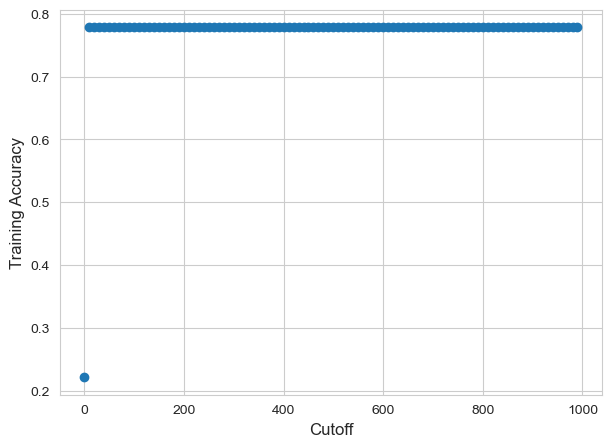

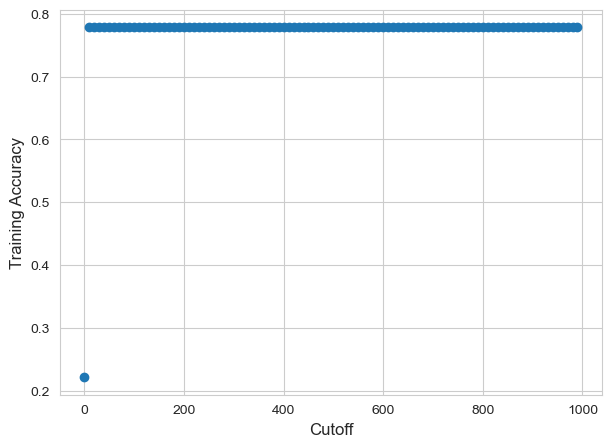

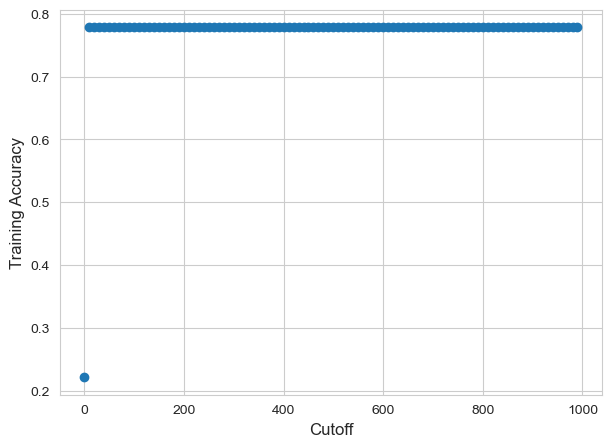

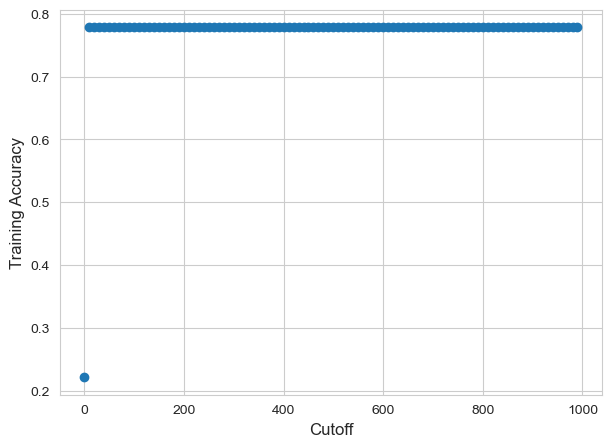

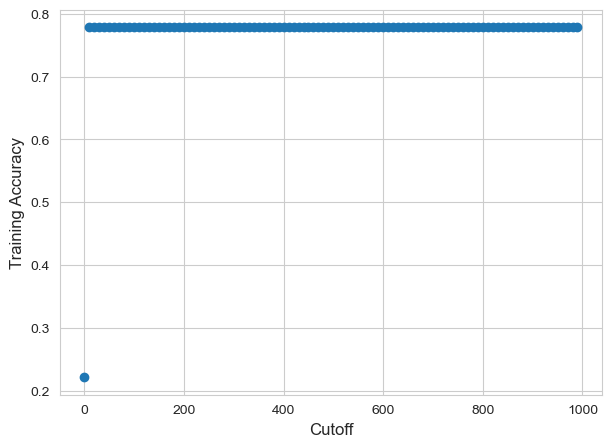

In [114]:
log_reg = LogisticRegression(penalty=None,max_iter=1000)

cutoffs = np.arange(0,1000,10)

for train_index, test_index in kfold.split(data_train.drop(["DEFAULT"],axis=1),data_train.DEFAULT):
    log_reg.fit(data_train.iloc[train_index].drop(["DEFAULT"],axis=1),data_train.iloc[train_index].DEFAULT)
    y_prob = log_reg.predict_proba(data_train.iloc[train_index].drop(["DEFAULT"],axis=1))[:,1]
    accs = []
    
    for cutoff in cutoffs:
        y_train_pred = 1*(y_prob >= cutoff)
        accs.append(np.sum(y_train_pred == data_train.iloc[train_index].DEFAULT)/len(data_train.iloc[train_index].DEFAULT))
    plt.figure(figsize=(7,5))
    plt.scatter(cutoffs,accs)
    plt.xlabel("Cutoff",fontsize=12)
    plt.ylabel("Training Accuracy",fontsize=12)
    plt.show()
    
    

0.0